In [38]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df_fix_epsilon = pd.read_csv("./results/SkinCancer/fix_epsilon.csv")
df_fix_sigma = pd.read_csv("./results/SkinCancer/fix_sigma.csv")

In [82]:
def plot_fix_epsilon(df, exp, output=False):
    baseline_targeted = df.loc[(df["exp"] == 1) & (df["targeted"] == 1) & (df["sigma"] == 0),
                        "100":"1000"].values.flatten()
    baseline_untargeted = df.loc[(df["exp"] == 1) & (df["targeted"] == 0) & (df["sigma"] == 0),
                          "100":"1000"].values.flatten()

    df_targeted = df[(df["exp"] == exp) & (df["targeted"] == 1)]
    df_untargeted = df[(df["exp"] == exp) & (df["targeted"] == 0)]
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 10), dpi=120, layout='constrained')
    queries = np.array([100, 200, 300, 400, 500, 1000])

    ax[0, 0].plot(queries, baseline_targeted, "k--", label="without defend")
    if output:
        for sigma in df_targeted["sigma"]:
            ax[0, 0].plot(queries, df_targeted.loc[df_targeted["sigma"] == sigma, "100":"1000"].values.flatten(),
                          label="lambda={}".format(sigma), marker=".")
    else:
        for sigma in df_targeted["sigma"]:
            ax[0, 0].plot(queries, df_targeted.loc[df_targeted["sigma"] == sigma, "100":"1000"].values.flatten(),
                          label="sigma={}".format(sigma), marker=".")
    ax[0, 0].legend()
    ax[0, 0].set_xticks(queries)
    ax[0, 0].set_xlabel("queries")
    ax[0, 0].set_ylabel("attack successful rate (%)")
    ax[0, 0].grid(True)
    ax[0, 0].set_title("Targeted")

    ax[1, 0].plot(queries, baseline_untargeted, "k--", label="without defend")
    if output:
        for sigma in df_untargeted["sigma"]:
            ax[1, 0].plot(queries, df_untargeted.loc[df_untargeted["sigma"] == sigma, "100":"1000"].values.flatten(),
                          label="lambda={}".format(sigma), marker=".")
    else:
        for sigma in df_untargeted["sigma"]:
            ax[1, 0].plot(queries, df_untargeted.loc[df_untargeted["sigma"] == sigma, "100":"1000"].values.flatten(),
                          label="sigma={}".format(sigma), marker=".")

    ax[1, 0].legend()
    ax[1, 0].set_xticks(queries)
    ax[1, 0].set_xlabel("queries")
    ax[1, 0].set_ylabel("attack successful rate (%)")
    ax[1, 0].grid(True)
    ax[1, 0].set_title("Untargeted")

    ax[0, 1].plot(df_targeted["sigma"].values.flatten(), df_targeted["500"].values.flatten(), marker=".")
    ax[0, 1].grid(True)
    ax[0, 1].set_xlabel("lambda" if output else "sigma")
    ax[0, 1].set_ylabel("attack successful rate (%)")

    ax[1, 1].plot(df_untargeted["sigma"].values.flatten(), df_untargeted["500"].values.flatten(), marker=".")
    ax[1, 1].grid(True)
    ax[1, 1].set_xlabel("lambda" if output else "sigma")
    ax[1, 1].set_ylabel("attack successful rate (%)")

    ax[0, 2].plot(df_targeted["sigma"].values.flatten(), df_targeted["acc"].values.flatten(), marker=".")
    ax[0, 2].grid(True)
    ax[0, 2].set_xlabel("lambda" if output else "sigma")
    ax[0, 2].set_ylabel("accuracy on clean images (%)")

    ax[1, 2].plot(df_untargeted["sigma"].values.flatten(), df_untargeted["acc"].values.flatten(), marker=".")
    ax[1, 2].grid(True)
    ax[1, 2].set_xlabel("lambda" if output else "sigma")
    ax[1, 2].set_ylabel("accuracy on clean images (%)")

    save_dir = os.path.join("../attack/image/SkinCancer/epsilon", "exp{}.png".format(exp))
    fig.savefig(save_dir)


# plot_fix_epsilon(df_fix_epsilon, 1)
# plot_fix_epsilon(df_fix_epsilon, 2)
# plot_fix_epsilon(df_fix_epsilon, 3)
# plot_fix_epsilon(df_fix_epsilon, 4)
# plot_fix_epsilon(df_fix_epsilon, 5, True)

In [89]:
def plot_fix_sigma(df, exp, sigma):
    df_targeted = df[(df["exp"] == exp) & (df["targeted"] == 1) & (df["sigma"] == sigma)]
    df_untargeted = df[(df["exp"] == exp) & (df["targeted"] == 0) & (df["sigma"] == sigma)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), dpi=120, layout='constrained')
    queries = np.array([100, 200, 300, 400, 500, 1000])
    for epsilon in df_targeted["epsilon"]:
        ax[0].plot(queries, df_targeted.loc[df_targeted["epsilon"] == epsilon, "100":"1000"].values.flatten(),
                   label="epsilon={}".format(epsilon), marker=".")
    ax[0].legend()
    ax[0].set_xticks(queries)
    ax[0].set_xlabel("queries")
    ax[0].set_ylabel("attack successful rate (%)")
    ax[0].grid(True)
    ax[0].set_title("Targeted")
    for epsilon in df_untargeted["epsilon"]:
        ax[1].plot(queries, df_untargeted.loc[df_untargeted["epsilon"] == epsilon, "100":"1000"].values.flatten(),
                   label="epsilon={}".format(epsilon), marker=".")
    ax[1].legend()
    ax[1].set_xticks(queries)
    ax[1].set_xlabel("queries")
    ax[1].set_ylabel("attack successful rate (%)")
    ax[1].grid(True)
    ax[1].set_title("Untargeted")

    save_dir = os.path.join("../attack/image/SkinCancer/sigma", "exp{}_sigma={}.png".format(exp, sigma))
    fig.savefig(save_dir)

In [90]:
# plot_fix_sigma(df_fix_sigma, 1, 0.01)
# plot_fix_sigma(df_fix_sigma, 2, 0.05)
# plot_fix_sigma(df_fix_sigma, 3, 0.04)
# plot_fix_sigma(df_fix_sigma, 5, 0.06)

In [91]:
# plot_fix_sigma(df_fix_sigma, 2, 0.07)
# plot_fix_sigma(df_fix_sigma, 3, 0.06)
# plot_fix_sigma(df_fix_sigma, 3, 0.05)

In [92]:
def plot_compare(df, queries):
    df_targeted = df[df["targeted"] == 1][["exp", "targeted", "epsilon", "acc", str(queries)]]
    df_untargeted = df[df["targeted"] == 0][["exp", "targeted", "epsilon", "acc", str(queries)]]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 10), dpi=120, layout='constrained')
    for exp in df_targeted["exp"].unique():
        X = df_targeted[df_targeted["exp"] == exp]["epsilon"].values.flatten()
        y = df_targeted[df_targeted["exp"] == exp][str(queries)].values.flatten()
        ax[0, 0].plot(X, y, label="exp{}".format(exp), marker=".")
    ax[0, 0].legend()
    ax[0, 0].set_xlabel("epsilon")
    ax[0, 0].set_ylabel("attack successful rate (%)")
    ax[0, 0].grid(True)
    ax[0, 0].set_title("Targeted attack on all model")

    for exp in df_untargeted["exp"].unique():
        X = df_untargeted[df_untargeted["exp"] == exp]["epsilon"].values.flatten()
        y = df_untargeted[df_untargeted["exp"] == exp][str(queries)].values.flatten()
        ax[1, 0].plot(X, y, label="exp{}".format(exp), marker=".")
    ax[1, 0].legend()
    ax[1, 0].set_xlabel("epsilon")
    ax[1, 0].set_ylabel("attack successful rate (%)")
    ax[1, 0].grid(True)
    ax[1, 0].set_title("Untargeted attack on all model")

    ax[0, 1].plot(df_targeted["exp"].unique(),
                  [df_targeted.loc[df_targeted["exp"] == exp, "acc"].values[0] for exp in df_targeted["exp"].unique()])
    ax[0, 1].set_xlabel("epsilon")
    ax[0, 1].set_ylabel("accuracy on clean images (%)")
    ax[0, 1].grid(True)
    ax[0, 1].set_title("Targeted attack on all model")
    ax[1, 1].plot(df_targeted["exp"].unique(),
                  [df_targeted.loc[df_targeted["exp"] == exp, "acc"].values[0] for exp in df_targeted["exp"].unique()])
    ax[1, 1].set_xlabel("epsilon")
    ax[1, 1].grid(True)
    ax[1, 1].set_ylabel("accuracy on clean images (%)")
    ax[1, 1].set_title("Untargeted attack on all model")

    save_dir = "../attack/image/SkinCancer/all.png"
    fig.savefig(save_dir)

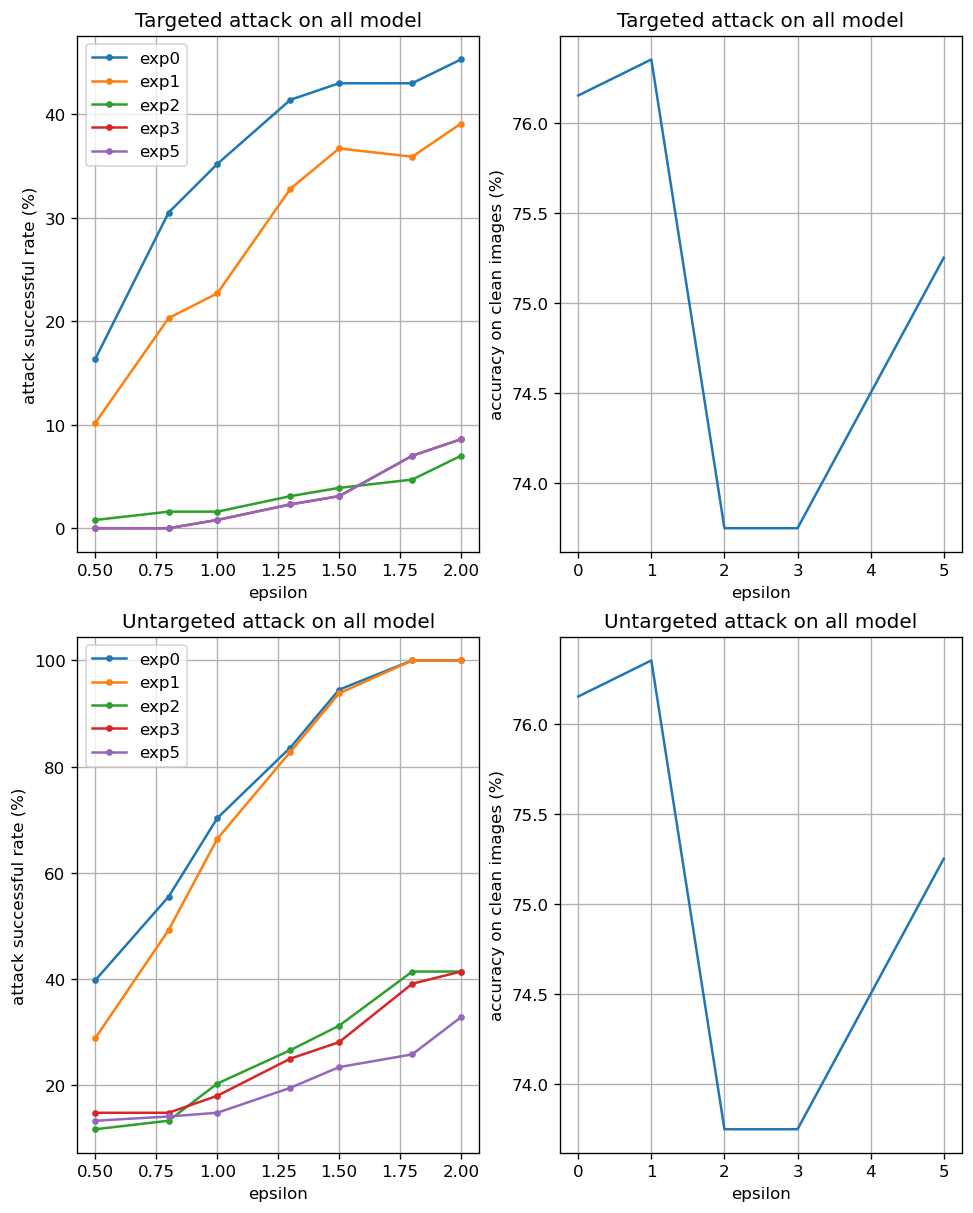

In [93]:
plot_compare(df_fix_sigma, 100)

In [77]:
df_fix_sigma

,exp,targeted,sigma,epsilon,100,200,300,400,500,1000,acc
0,0,1,0.00,0.5,16.4,27.3,35.9,38.3,39.1,39.8,76.15
1,0,1,0.00,0.8,30.5,37.5,38.3,39.1,43.0,43.0,76.15
2,0,1,0.00,1.0,35.2,42.2,42.2,43.8,46.1,46.9,76.15
3,0,1,0.00,1.3,41.4,43.8,46.9,49.2,51.6,51.6,76.15
4,0,1,0.00,1.5,43.0,46.9,49.2,50.0,50.0,53.1,76.15
...,...,...,...,...,...,...,...,...,...,...,...
65,5,0,0.06,1.0,14.8,17.2,21.9,24.2,25.8,46.9,75.25
66,5,0,0.06,1.3,19.5,21.9,27.3,28.9,35.2,56.2,75.25
67,5,0,0.06,1.5,23.4,25.0,32.8,35.9,45.3,64.8,75.25
68,5,0,0.06,1.8,25.8,29.7,39.1,47.7,52.3,78.9,75.25
